In [2]:
#imports
import pandas as pd

In [3]:
from datasets import load_dataset

#dataset = load_dataset("tomasg25/scientific_lay_summarisation", "elife") # replace "plos" with "elife" for eLife dataset
dataset = load_dataset("Samsung/samsum", "samsum")

# Text Analysis
Summary length distribution and article length distribution in the training set.

In [4]:
article_lengths = [len(entry['dialogue'].split()) for entry in dataset['train']]
summary_lengths = [len(entry['summary'].split()) for entry in dataset['train']]

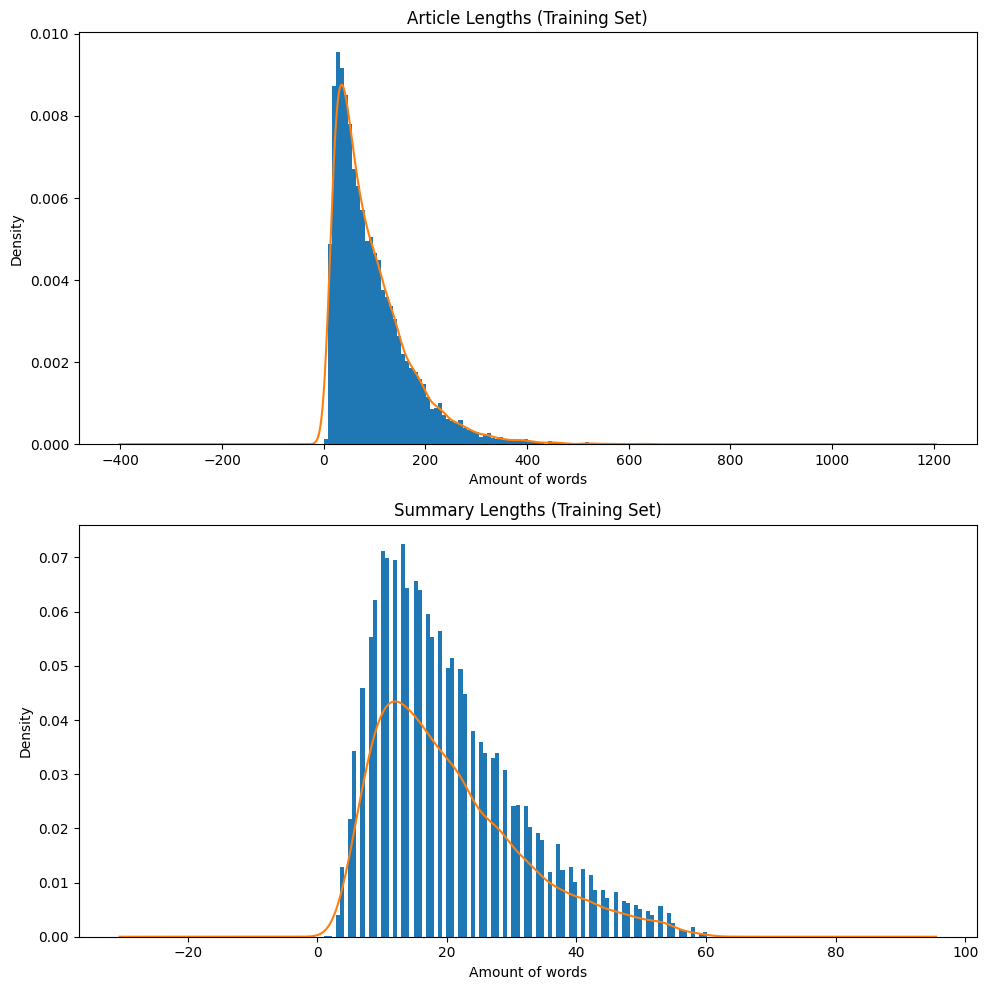

In [9]:
import matplotlib.pyplot as plt

article_lengths_df = pd.DataFrame(article_lengths) 
summary_lengths_df = pd.DataFrame(summary_lengths)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

article_lengths_df.hist(ax=ax1, bins=100, density=True) 
article_lengths_df.plot(kind="kde", ax=ax1)
ax1.set_title("Article Lengths (Training Set)")
ax1.set_xlabel("Amount of words")
ax1.set_ylabel("Density")
ax1.get_legend().remove()

summary_lengths_df.hist(ax=ax2, bins=100, density=True)
summary_lengths_df.plot(kind="kde", ax=ax2) 
ax2.set_title("Summary Lengths (Training Set)")
ax2.set_xlabel("Amount of words")
ax2.set_ylabel("Density") 
ax2.get_legend().remove()

plt.tight_layout()
plt.show()

## Word Cloud

In [8]:
from wordcloud import WordCloud
from collections import Counter
from tqdm.notebook import tqdm

## Articles

In [9]:
combined_counter = Counter()

for entry in tqdm(dataset['train'], desc="Computing word counts"):
    word_counter = Counter(entry['dialogue'].split())
    combined_counter.update(word_counter)
    

Computing word counts:   0%|          | 0/14732 [00:00<?, ?it/s]

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(combined_counter)

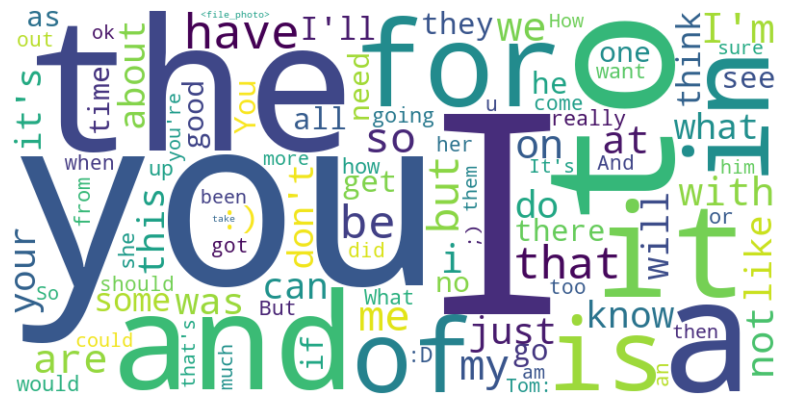

In [11]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Summaries

In [12]:
combined_counter = Counter()

for entry in tqdm(dataset['train'], desc="Computing word counts"):
    word_counter = Counter(entry['summary'].split())
    combined_counter.update(word_counter)

Computing word counts:   0%|          | 0/14732 [00:00<?, ?it/s]

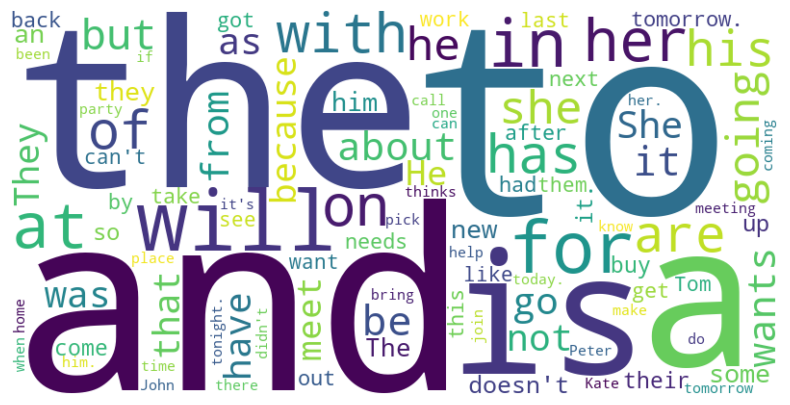

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(combined_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()